Author: MD Rakib Hasan

Date: 23-5-23

# Project Name: End To End Data Analytics Project Northwards Company

About Northwind Traders Company:
Sales & order data for Northwind Traders, a fictitious gourmet food supplier, including information on customers, products, orders, shippers, and employees.
This is the official dataset for the Maven Northwind Challenge.

# Problem Statement

you need to build a top-level KPI dashboard to help Northwind Traders' executives quickly understand the company's performance in key areas..

# Load Library:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset:

In [5]:
df=pd.read_csv(r"F:\Data Analyst\Project\End to End Northwind Traders Project\2. Dataset.csv")
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df

,Order_ID,Customer_ID,Employee_ID,Order_Date,Require_date,Shipper_Date,Shipper_ID,Freight,Company_Name,Contact_Name,...,Quantity,Discount,Product_Name,Quantity_Per_Unit,Product_Unit_Price,Discontinued,Category_ID,Shipper_Company,Category_Name,Description
0,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,12.0,0.00,Queso Cabrales,1 kg pkg.,21.00,0,4,Federal Shipping,Dairy Products,Cheeses
1,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,10.0,0.00,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14.00,1,5,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal"
2,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,NaN,0.00,Mozzarella di Giovanni,24 - 200 g pkgs.,34.80,0,4,Federal Shipping,Dairy Products,Cheeses
3,10249,TOMSP,6,7/5/2013,8/16/2013,7/10/2013,1,11.61,Toms Spezialitäten,Karin Josephs,...,9.0,0.00,Tofu,40 - 100 g pkgs.,23.25,0,7,Speedy Express,Produce,Dried fruit and bean curd
4,10249,TOMSP,6,7/5/2013,8/16/2013,7/10/2013,1,11.61,Toms Spezialitäten,Karin Josephs,...,40.0,0.00,Manjimup Dried Apples,50 - 300 g pkgs.,53.00,0,7,Speedy Express,Produce,Dried fruit and bean curd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,70.0,0.05,Rössle Sauerkraut,25 - 825 g cans,45.60,1,7,Federal Shipping,Produce,Dried fruit and bean curd
2174,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,90.0,0.05,Sasquatch Ale,24 - 12 oz bottles,14.00,0,1,Federal Shipping,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2175,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,21.0,0.00,Flotemysost,10 - 500 g pkgs.,21.50,0,4,Federal Shipping,Dairy Products,Cheeses
2176,11009,GODOS,2,4/8/2015,5/6/2015,4/10/2015,1,59.11,Godos Cocina Típica,José Pedro Freyre,...,12.0,0.00,Guarana Fantastica,12 - 355 ml cans,4.50,1,1,Speedy Express,Beverages,"Soft drinks, coffees, teas, beers, and ales"


# Understanding Data

In [6]:
# show first five rows
df.head(5)

,Order_ID,Customer_ID,Employee_ID,Order_Date,Require_date,Shipper_Date,Shipper_ID,Freight,Company_Name,Contact_Name,...,Quantity,Discount,Product_Name,Quantity_Per_Unit,Product_Unit_Price,Discontinued,Category_ID,Shipper_Company,Category_Name,Description
0,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,12.0,0.0,Queso Cabrales,1 kg pkg.,21.00,0,4,Federal Shipping,Dairy Products,Cheeses
1,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,10.0,0.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14.00,1,5,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal"
2,10248,VINET,5,7/4/2013,8/1/2013,7/16/2013,3,32.38,Vins et alcools Chevalier,Paul Henriot,...,NaN,0.0,Mozzarella di Giovanni,24 - 200 g pkgs.,34.80,0,4,Federal Shipping,Dairy Products,Cheeses
3,10249,TOMSP,6,7/5/2013,8/16/2013,7/10/2013,1,11.61,Toms Spezialitäten,Karin Josephs,...,9.0,0.0,Tofu,40 - 100 g pkgs.,23.25,0,7,Speedy Express,Produce,Dried fruit and bean curd
4,10249,TOMSP,6,7/5/2013,8/16/2013,7/10/2013,1,11.61,Toms Spezialitäten,Karin Josephs,...,40.0,0.0,Manjimup Dried Apples,50 - 300 g pkgs.,53.00,0,7,Speedy Express,Produce,Dried fruit and bean curd


In [7]:
# show last five rows
df.tail(5)

,Order_ID,Customer_ID,Employee_ID,Order_Date,Require_date,Shipper_Date,Shipper_ID,Freight,Company_Name,Contact_Name,...,Quantity,Discount,Product_Name,Quantity_Per_Unit,Product_Unit_Price,Discontinued,Category_ID,Shipper_Company,Category_Name,Description
2173,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,70.0,0.05,Rössle Sauerkraut,25 - 825 g cans,45.6,1,7,Federal Shipping,Produce,Dried fruit and bean curd
2174,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,90.0,0.05,Sasquatch Ale,24 - 12 oz bottles,14.0,0,1,Federal Shipping,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2175,11008,ERNSH,7,4/8/2015,5/6/2015,NaN,3,79.46,Ernst Handel,Roland Mendel,...,21.0,0.00,Flotemysost,10 - 500 g pkgs.,21.5,0,4,Federal Shipping,Dairy Products,Cheeses
2176,11009,GODOS,2,4/8/2015,5/6/2015,4/10/2015,1,59.11,Godos Cocina Típica,José Pedro Freyre,...,12.0,0.00,Guarana Fantastica,12 - 355 ml cans,4.5,1,1,Speedy Express,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2177,11009,GODOS,2,4/8/2015,5/6/2015,4/10/2015,1,59.11,Godos Cocina Típica,José Pedro Freyre,...,18.0,0.25,Inlagd Sill,24 - 250 g jars,19.0,0,8,Speedy Express,Seafood,Seaweed and fish


In [8]:
# show sample five rows
df.sample(5)

,Order_ID,Customer_ID,Employee_ID,Order_Date,Require_date,Shipper_Date,Shipper_ID,Freight,Company_Name,Contact_Name,...,Quantity,Discount,Product_Name,Quantity_Per_Unit,Product_Unit_Price,Discontinued,Category_ID,Shipper_Company,Category_Name,Description
1016,10633,ERNSH,7,8/15/2014,9/12/2014,8/18/2014,3,477.90,Ernst Handel,Roland Mendel,...,80.0,0.15,Tarte au sucre,48 pies,49.3,0,3,Federal Shipping,Confections,"Desserts, candies, and sweet breads"
322,10368,ERNSH,2,11/29/2013,12/27/2013,12/2/2013,2,101.95,Ernst Handel,Roland Mendel,...,25.0,0.00,Ravioli Angelo,24 - 250 g pkgs.,19.5,0,5,United Package,Grains & Cereals,"Breads, crackers, pasta, and cereal"
1726,10912,HUNGO,2,2/26/2015,3/26/2015,3/18/2015,2,580.91,Hungry Owl All-Night Grocers,Patricia McKenna,...,40.0,0.25,Queso Cabrales,1 kg pkg.,21.0,0,4,United Package,Dairy Products,Cheeses
58,10269,WHITC,5,7/31/2013,8/14/2013,8/9/2013,1,4.56,White Clover Markets,Karl Jablonski,...,20.0,0.05,Mozzarella di Giovanni,24 - 200 g pkgs.,34.8,0,4,Speedy Express,Dairy Products,Cheeses
1857,10965,OLDWO,6,3/20/2015,4/17/2015,3/30/2015,3,144.38,Old World Delicatessen,Rene Phillips,...,16.0,0.00,Manjimup Dried Apples,50 - 300 g pkgs.,53.0,0,7,Federal Shipping,Produce,Dried fruit and bean curd


In [10]:
# see columns name
df.columns

Index(['Order_ID', 'Customer_ID', 'Employee_ID', 'Order_Date', 'Require_date',
       'Shipper_Date', 'Shipper_ID', 'Freight', 'Company_Name', 'Contact_Name',
       'Contact_Title', 'Customer_City', 'Customer_Country', 'EmployeeName',
       'Employee_Title', 'Employee_City', 'Employee_Country', 'Reports_To',
       'Product_ID', 'Unit_Price', 'Quantity', 'Discount', 'Product_Name',
       'Quantity_Per_Unit', 'Product_Unit_Price', 'Discontinued',
       'Category_ID', 'Shipper_Company', 'Category_Name', 'Description'],
      dtype='object')

In [11]:
# to see data shape
df.shape

(2178, 30)

In [13]:
# to see data types
df.dtypes

Order_ID                int64
Customer_ID            object
Employee_ID             int64
Order_Date             object
Require_date           object
Shipper_Date           object
Shipper_ID              int64
Freight               float64
Company_Name           object
Contact_Name           object
Contact_Title          object
Customer_City          object
Customer_Country       object
EmployeeName           object
Employee_Title         object
Employee_City          object
Employee_Country       object
Reports_To            float64
Product_ID              int64
Unit_Price            float64
Quantity              float64
Discount              float64
Product_Name           object
Quantity_Per_Unit      object
Product_Unit_Price    float64
Discontinued            int64
Category_ID             int64
Shipper_Company        object
Category_Name          object
Description            object
dtype: object

In [14]:
# to seee basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order_ID            2178 non-null   int64  
 1   Customer_ID         2178 non-null   object 
 2   Employee_ID         2178 non-null   int64  
 3   Order_Date          2178 non-null   object 
 4   Require_date        2178 non-null   object 
 5   Shipper_Date        2093 non-null   object 
 6   Shipper_ID          2178 non-null   int64  
 7   Freight             2178 non-null   float64
 8   Company_Name        2178 non-null   object 
 9   Contact_Name        2178 non-null   object 
 10  Contact_Title       2178 non-null   object 
 11  Customer_City       2178 non-null   object 
 12  Customer_Country    2178 non-null   object 
 13  EmployeeName        2178 non-null   object 
 14  Employee_Title      2178 non-null   object 
 15  Employee_City       2178 non-null   object 
 16  Employ

In [15]:
# to see basic descriptive statistics numerical columns
df.describe()

,Order_ID,Employee_ID,Shipper_ID,Freight,Reports_To,Product_ID,Unit_Price,Quantity,Discount,Product_Unit_Price,Discontinued,Category_ID
count,2178.000000,2178.000000,2178.000000,2178.000000,1933.000000,2178.000000,2178.000000,2156.000000,2178.000000,2150.000000,2178.000000,2178.000000
mean,10663.333792,4.321396,1.998163,95.724403,6.115882,40.836088,26.267365,23.783859,0.055904,28.002726,0.106979,4.133609
std,243.163950,2.494737,0.772754,132.548868,2.375692,22.178261,29.846293,19.116826,0.083358,31.756949,0.309157,2.379491
min,10248.000000,1.000000,1.000000,0.020000,2.000000,1.000000,2.000000,1.000000,0.000000,2.500000,0.000000,1.000000
25%,10453.000000,2.000000,1.000000,18.690000,5.000000,22.000000,12.000000,10.000000,0.000000,12.500000,0.000000,2.000000
50%,10661.500000,4.000000,2.000000,53.265000,8.000000,41.000000,18.400000,20.000000,0.000000,19.450000,0.000000,4.000000
75%,10869.750000,7.000000,3.000000,119.605000,8.000000,60.000000,32.000000,30.000000,0.100000,34.000000,0.000000,6.000000
max,11077.000000,9.000000,3.000000,1007.640000,8.000000,77.000000,263.500000,130.000000,0.250000,263.500000,1.000000,8.000000


In [18]:
# to see basic descriptive statistics numerical columns
df.describe(include='object')

,Customer_ID,Order_Date,Require_date,Shipper_Date,Company_Name,Contact_Name,Contact_Title,Customer_City,Customer_Country,EmployeeName,Employee_Title,Employee_City,Employee_Country,Product_Name,Quantity_Per_Unit,Shipper_Company,Category_Name,Description
count,2178,2178,2178,2093,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178
unique,89,480,454,387,89,89,12,69,21,9,3,6,2,77,70,3,8,8
top,SAVEA,5/6/2015,6/3/2015,4/10/2015,Save-a-lot Markets,Jose Pavarotti,Sales Representative,Boise,USA,Margaret Peacock,Sales Representative,New York,USA,Raclette Courdavault,24 - 12 oz bottles,United Package,Beverages,"Soft drinks, coffees, teas, beers, and ales"
freq,116,41,41,25,116,116,417,116,363,420,1553,1602,1607,55,110,878,410,410


# Data Cleaning

In [20]:
# to see duplicated value
df.duplicated().sum()

23

In [21]:
# see duplicated value
df[df.duplicated()]

,Order_ID,Customer_ID,Employee_ID,Order_Date,Require_date,Shipper_Date,Shipper_ID,Freight,Company_Name,Contact_Name,...,Quantity,Discount,Product_Name,Quantity_Per_Unit,Product_Unit_Price,Discontinued,Category_ID,Shipper_Company,Category_Name,Description
2155,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,3.0,0.02,Spegesild,4 - 450 g glasses,12.00,0,8,United Package,Seafood,Seaweed and fish
2156,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.00,Filo Mix,16 - 2 kg boxes,7.00,0,5,United Package,Grains & Cereals,"Breads, crackers, pasta, and cereal"
2157,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.00,Pâté chinois,24 boxes x 2 pies,24.00,0,6,United Package,Meat & Poultry,Prepared meats
2158,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.06,Camembert Pierrot,15 - 300 g rounds,34.00,0,4,United Package,Dairy Products,Cheeses
2159,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.03,Wimmers gute Semmelknödel,20 bags x 4 pieces,33.25,0,5,United Package,Grains & Cereals,"Breads, crackers, pasta, and cereal"
2160,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,1.0,0.00,Louisiana Hot Spiced Okra,24 - 8 oz jars,17.00,0,2,United Package,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2161,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.01,Röd Kaviar,24 - 150 g jars,15.00,0,8,United Package,Seafood,Seaweed and fish
2162,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,4.0,0.00,Rhönbräu Klosterbier,24 - 0.5 l bottles,7.75,0,1,United Package,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2163,11077,RATTC,1,5/6/2015,6/3/2015,NaN,2,8.53,Rattlesnake Canyon Grocery,Paula Wilson,...,2.0,0.00,Original Frankfurter Grüne Soße,12 boxes,13.00,0,2,United Package,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2164,11004,MAISD,3,4/7/2015,5/5/2015,4/20/2015,1,44.84,Maison Dewey,Catherine Dewey,...,6.0,0.00,Gumbär Gummibärchen,100 - 250 g bags,31.23,0,3,Speedy Express,Confections,"Desserts, candies, and sweet breads"


In [23]:
# delete duplicated value
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

Now Dataset has no duplicated value.

In [25]:
# check null value
df.isnull().sum()

Order_ID                0
Customer_ID             0
Employee_ID             0
Order_Date              0
Require_date            0
Shipper_Date           73
Shipper_ID              0
Freight                 0
Company_Name            0
Contact_Name            0
Contact_Title           0
Customer_City           0
Customer_Country        0
EmployeeName            0
Employee_Title          0
Employee_City           0
Employee_Country        0
Reports_To            241
Product_ID              0
Unit_Price              0
Quantity               22
Discount                0
Product_Name            0
Quantity_Per_Unit       0
Product_Unit_Price     28
Discontinued            0
Category_ID             0
Shipper_Company         0
Category_Name           0
Description             0
dtype: int64

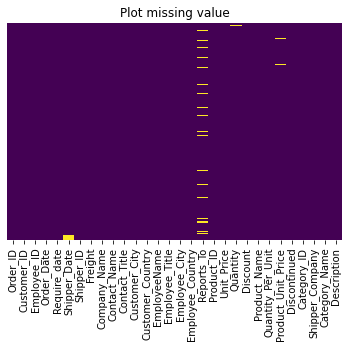

In [26]:
# plot null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.title('Plot missing value');

In [47]:
# pecentage of missing value
pct=((df.isnull().sum()/len(df))*100)
pct.sort_values(ascending=False)

Quantity              1.020882
Order_ID              0.000000
Customer_ID           0.000000
Category_Name         0.000000
Shipper_Company       0.000000
Category_ID           0.000000
Discontinued          0.000000
Product_Unit_Price    0.000000
Quantity_Per_Unit     0.000000
Product_Name          0.000000
Discount              0.000000
Unit_Price            0.000000
Product_ID            0.000000
Reports_To            0.000000
Employee_Country      0.000000
Employee_City         0.000000
Employee_Title        0.000000
EmployeeName          0.000000
Customer_Country      0.000000
Customer_City         0.000000
Contact_Title         0.000000
Contact_Name          0.000000
Company_Name          0.000000
Freight               0.000000
Shipper_ID            0.000000
Shipper_Date          0.000000
Require_date          0.000000
Order_Date            0.000000
Employee_ID           0.000000
Description           0.000000
dtype: float64

In [36]:
# Missing Handel Value Reports To Column
df['Reports_To']=df['Reports_To'].fillna(df['Reports_To'].mode()[0])

In [42]:
# Missing Handel Value Shipper_date Column
df['Shipper_Date']=df['Shipper_Date'].fillna(df['Shipper_Date'].mode()[0])

In [46]:
# Missing Handel Value Product_Unit_Price Column
df['Product_Unit_Price']=df['Product_Unit_Price'].fillna(round(df['Product_Unit_Price'].mean(),2))

In [50]:
# Missing Handel Value Quantity Column
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mode()[0])

In [51]:
# check again missing value
df.isnull().sum()

Order_ID              0
Customer_ID           0
Employee_ID           0
Order_Date            0
Require_date          0
Shipper_Date          0
Shipper_ID            0
Freight               0
Company_Name          0
Contact_Name          0
Contact_Title         0
Customer_City         0
Customer_Country      0
EmployeeName          0
Employee_Title        0
Employee_City         0
Employee_Country      0
Reports_To            0
Product_ID            0
Unit_Price            0
Quantity              0
Discount              0
Product_Name          0
Quantity_Per_Unit     0
Product_Unit_Price    0
Discontinued          0
Category_ID           0
Shipper_Company       0
Category_Name         0
Description           0
dtype: int64

Dataset has no Missing Value

In [53]:
# change Date columns datatype
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Require_date']=pd.to_datetime(df['Require_date'])
df['Shipper_Date']=pd.to_datetime(df['Shipper_Date'])

In [57]:
#Rearrange Columns 
df=df[['Order_ID','Customer_ID','Employee_ID','Shipper_ID','Product_ID','Category_ID','Order_Date','Require_date','Shipper_Date','Company_Name','Contact_Name','Contact_Title','Customer_City','Customer_Country','EmployeeName','Employee_Title','Employee_City','Employee_Country','Reports_To','Product_Name','Quantity_Per_Unit','Product_Unit_Price','Discontinued','Category_Name','Description','Shipper_Company','Freight','Unit_Price','Quantity','Discount']]

In [62]:
# Rename Freight COlumns
df.rename(columns={'Freight':'Cost'},inplace=True)

In [81]:
# Rename Freight COlumns
df.rename(columns={'Contact_Name':'Customer_Name','Contact_Title':'Customer_Title'},inplace=True)

In [79]:
df.head()

,Order_ID,Customer_ID,Employee_ID,Shipper_ID,Product_ID,Category_ID,Order_Date,Require_date,Shipper_Date,Company_Name,...,Discount,Revenue,Profit,Year,Month,Day,Quarter,Day_Name,Weekend_Flag,Processing_Time
0,10248,VINET,5,3,11,4,2013-07-04,2013-08-01,2013-07-16,Vins et alcools Chevalier,...,0.0,168.0,135.62,2013,7,4,3,Thursday,0,12 days
1,10248,VINET,5,3,42,5,2013-07-04,2013-08-01,2013-07-16,Vins et alcools Chevalier,...,0.0,98.0,65.62,2013,7,4,3,Thursday,0,12 days
2,10248,VINET,5,3,72,4,2013-07-04,2013-08-01,2013-07-16,Vins et alcools Chevalier,...,0.0,696.0,663.62,2013,7,4,3,Thursday,0,12 days
3,10249,TOMSP,6,1,14,7,2013-07-05,2013-08-16,2013-07-10,Toms Spezialitäten,...,0.0,167.4,155.79,2013,7,5,3,Friday,1,5 days
4,10249,TOMSP,6,1,51,7,2013-07-05,2013-08-16,2013-07-10,Toms Spezialitäten,...,0.0,1696.0,1684.39,2013,7,5,3,Friday,1,5 days


# Feature Enginnering:

In [64]:
# adding Revenue Columns
df['Revenue']=(1-df['Discount'])*(df['Unit_Price']*df['Quantity'])

In [66]:
# adding Profit Columns
df['Profit']=df['Revenue']-df['Cost']

In [71]:
# Extract Order Year,Day,Month,Quareter,OrderDay,Order_Month from order Date columns
df['Year']=df['Order_Date'].dt.year
df['Month']=df['Order_Date'].dt.month
df['Day']=df['Order_Date'].dt.day
df['Quarter']=df['Order_Date'].dt.quarter
df['Day_Name']=df['Order_Date'].dt.day_name()

In [73]:
# weekend Flag
def day(feature):
    if feature=='Friday':
        return 1
    elif feature=='Saturday':
        return 1
    else:
        return 0

In [76]:
df['Weekend_Flag']=df['Day_Name'].apply(day)

In [78]:
df['Processing_Time']=df['Shipper_Date']-df['Order_Date']

In [82]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Employee_ID', 'Shipper_ID', 'Product_ID',
       'Category_ID', 'Order_Date', 'Require_date', 'Shipper_Date',
       'Company_Name', 'Customer_Name', 'Customer_Title', 'Customer_City',
       'Customer_Country', 'EmployeeName', 'Employee_Title', 'Employee_City',
       'Employee_Country', 'Reports_To', 'Product_Name', 'Quantity_Per_Unit',
       'Product_Unit_Price', 'Discontinued', 'Category_Name', 'Description',
       'Shipper_Company', 'Cost', 'Unit_Price', 'Quantity', 'Discount',
       'Revenue', 'Profit', 'Year', 'Month', 'Day', 'Quarter', 'Day_Name',
       'Weekend_Flag', 'Processing_Time'],
      dtype='object')

In [83]:
# Need Columns For Analysis Purpose
eda_df=df[['Order_ID','Order_Date','Shipper_Date','Company_Name','Customer_Name','Customer_City','Customer_Country','EmployeeName','Employee_City','Employee_Country','Product_Name','Category_Name','Shipper_Company','Processing_Time','Year','Day_Name','Month','Quarter','Weekend_Flag','Quantity','Cost','Profit','Revenue']]

In [85]:
eda_df.to_csv(r"F:\Data Analyst\Project\End to End Northwind Traders Project\00.Analysis_Dataset.csv")

In [86]:
eda_df.to_csv(r"F:\Data Analyst\Project\End to End Northwind Traders Project\00.Clean_Dataset.csv")